In [2]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml

In [3]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [51]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
   
    min = stack.average(TR, c, delta)
    
    return min**10

In [52]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((1,20))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    return result

In [54]:
a.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 985.632134935    | passive   |
|   2 |     112003 | 10.0             | passive   |
|   3 |     114203 | 10.0             | passive   |
|   4 |     112003 | 10.0             | passive   |
|   5 |     114203 | 10.0             | passive   |
|   6 |     112003 | 10.0             | passive   |
|   7 |     114203 | 10.0             | passive   |
|   8 |     112003 | 10.0000000149    | passive   |
|   9 |     114203 | 50               | passive   |
|  10 |     116605 | 2000             | absorber  |


In [56]:
peak = 0.6
delta = 0.2

In [61]:
result = minTR(a, [1,len(a.config)-2], peak, delta, TR='R')

[1, 9]


In [62]:
result

  status: 8
 success: False
    njev: 1
    nfev: 11
     fun: 1.4375219223539644e-09
       x: array([ 985.63213494,   10.        ,   10.        ,   10.        ,
         10.        ,   10.        ,   10.00000001,   10.00000001,
         50.00000001])
 message: 'Positive directional derivative for linesearch'
     jac: array([ -1.15228660e-12,  -1.15209231e-12,   5.34910033e-11,
        -3.45326406e-11,   6.38141068e-11,  -1.85143012e-11,
         2.62856542e-11,   2.86478896e-11,  -1.77619586e-11,
         0.00000000e+00])
     nit: 5

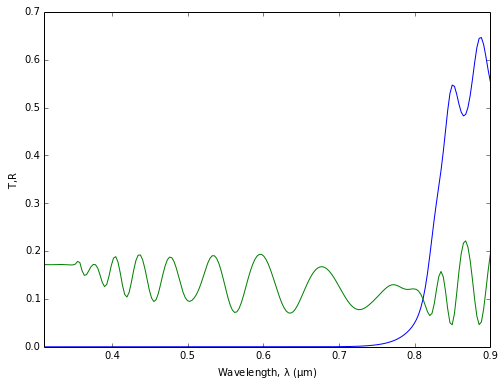

In [63]:
a.plot()